# Lab 3 – Morphological Operations: Erosion and Dilation 
### Aim: To apply morphological operations such as erosion and dilation to refine segmented or binary images. 
### Objectives: 
- **Understand morphological operations in image processing.** 
- **Apply erosion to remove small white noise and separate connected components.** 
- **Apply dilation to enlarge and strengthen object boundaries.** 
- **Implement morphological opening and closing using erosion and dilation combinations.** 
- **Visualize the effects of morphological transformations on segmentation masks.** 

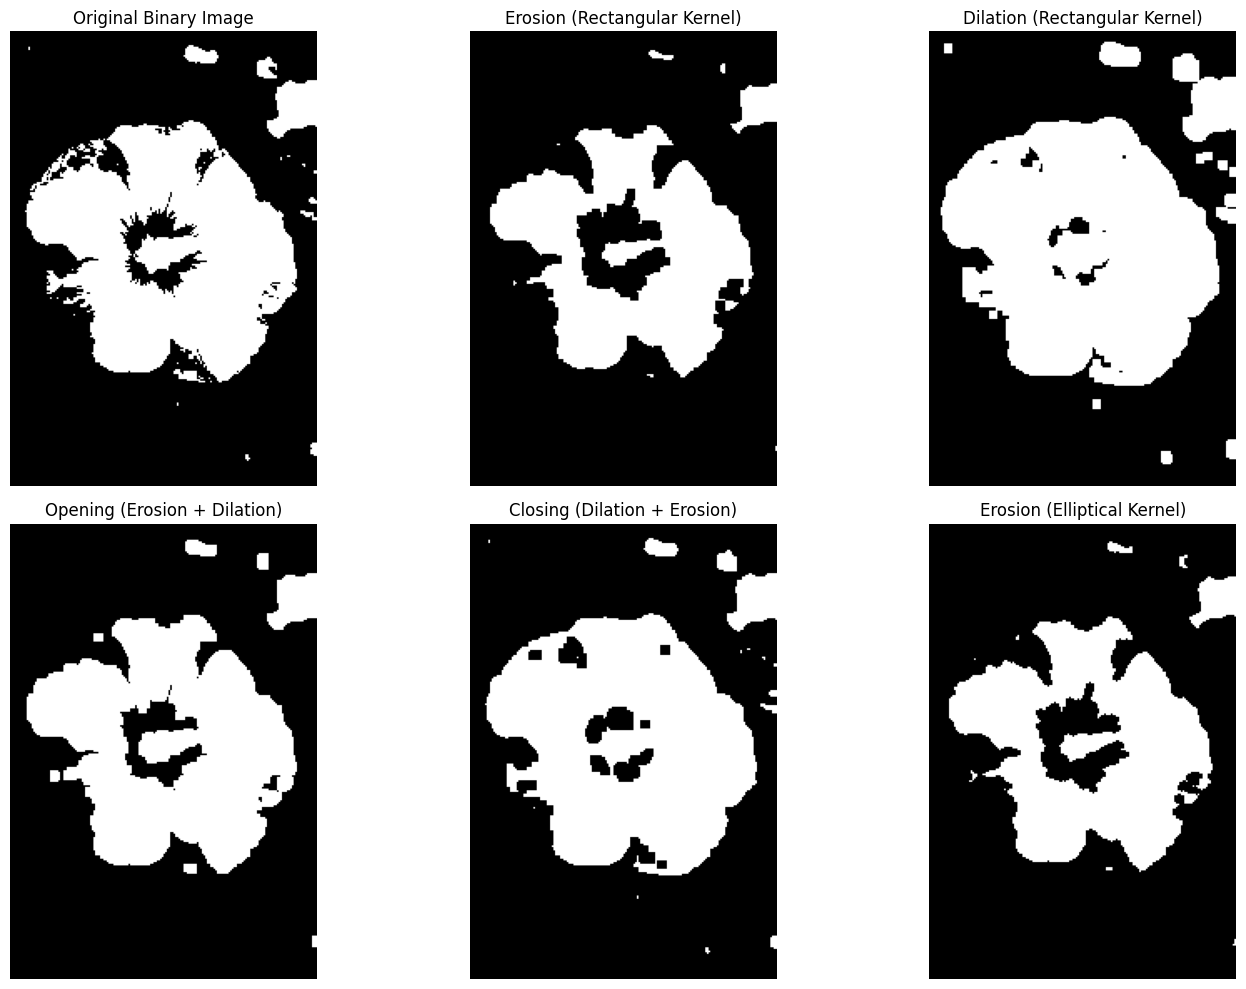

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image in grayscale
img = cv2.imread(r"C:\Users\SHRAVINYA\Downloads\images (1).jpg", cv2.IMREAD_GRAYSCALE)

# Step 2: Convert to binary for better results
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Step 3: Define different kernels
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Step 4: Apply erosion and dilation with rectangular kernel
eroded = cv2.erode(binary, kernel_rect, iterations=1)
dilated = cv2.dilate(binary, kernel_rect, iterations=1)

# Step 5: Apply morphological opening and closing
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_rect)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel_rect)

# Step 6: Compare effects of different kernel shapes (optional visualization)
eroded_ellipse = cv2.erode(binary, kernel_ellipse, iterations=1)
eroded_cross = cv2.erode(binary, kernel_cross, iterations=1)

# Step 7: Display results
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(binary, cmap='gray')
plt.title("Original Binary Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(eroded, cmap='gray')
plt.title("Erosion (Rectangular Kernel)")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(dilated, cmap='gray')
plt.title("Dilation (Rectangular Kernel)")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(opened, cmap='gray')
plt.title("Opening (Erosion + Dilation)")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(closed, cmap='gray')
plt.title("Closing (Dilation + Erosion)")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(eroded_ellipse, cmap='gray')
plt.title("Erosion (Elliptical Kernel)")
plt.axis('off')

plt.tight_layout()
plt.show()
